In [1]:
from sklearn.datasets import make_regression

In [2]:
x0, y, coef = make_regression(
n_samples=100, n_features=1, noise=30, coef=True, random_state=0)

In [3]:
dfx0 = pd.DataFrame(x0, columns=["X"])

In [4]:
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfx, dfy], axis=1)

In [5]:
model = sm.OLS.from_formula("Y~X", data=df)

In [6]:
result = model.fit()

In [7]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.7578983061
ESS =  188589.61349210917
RSS =  102754.33755137534
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922585


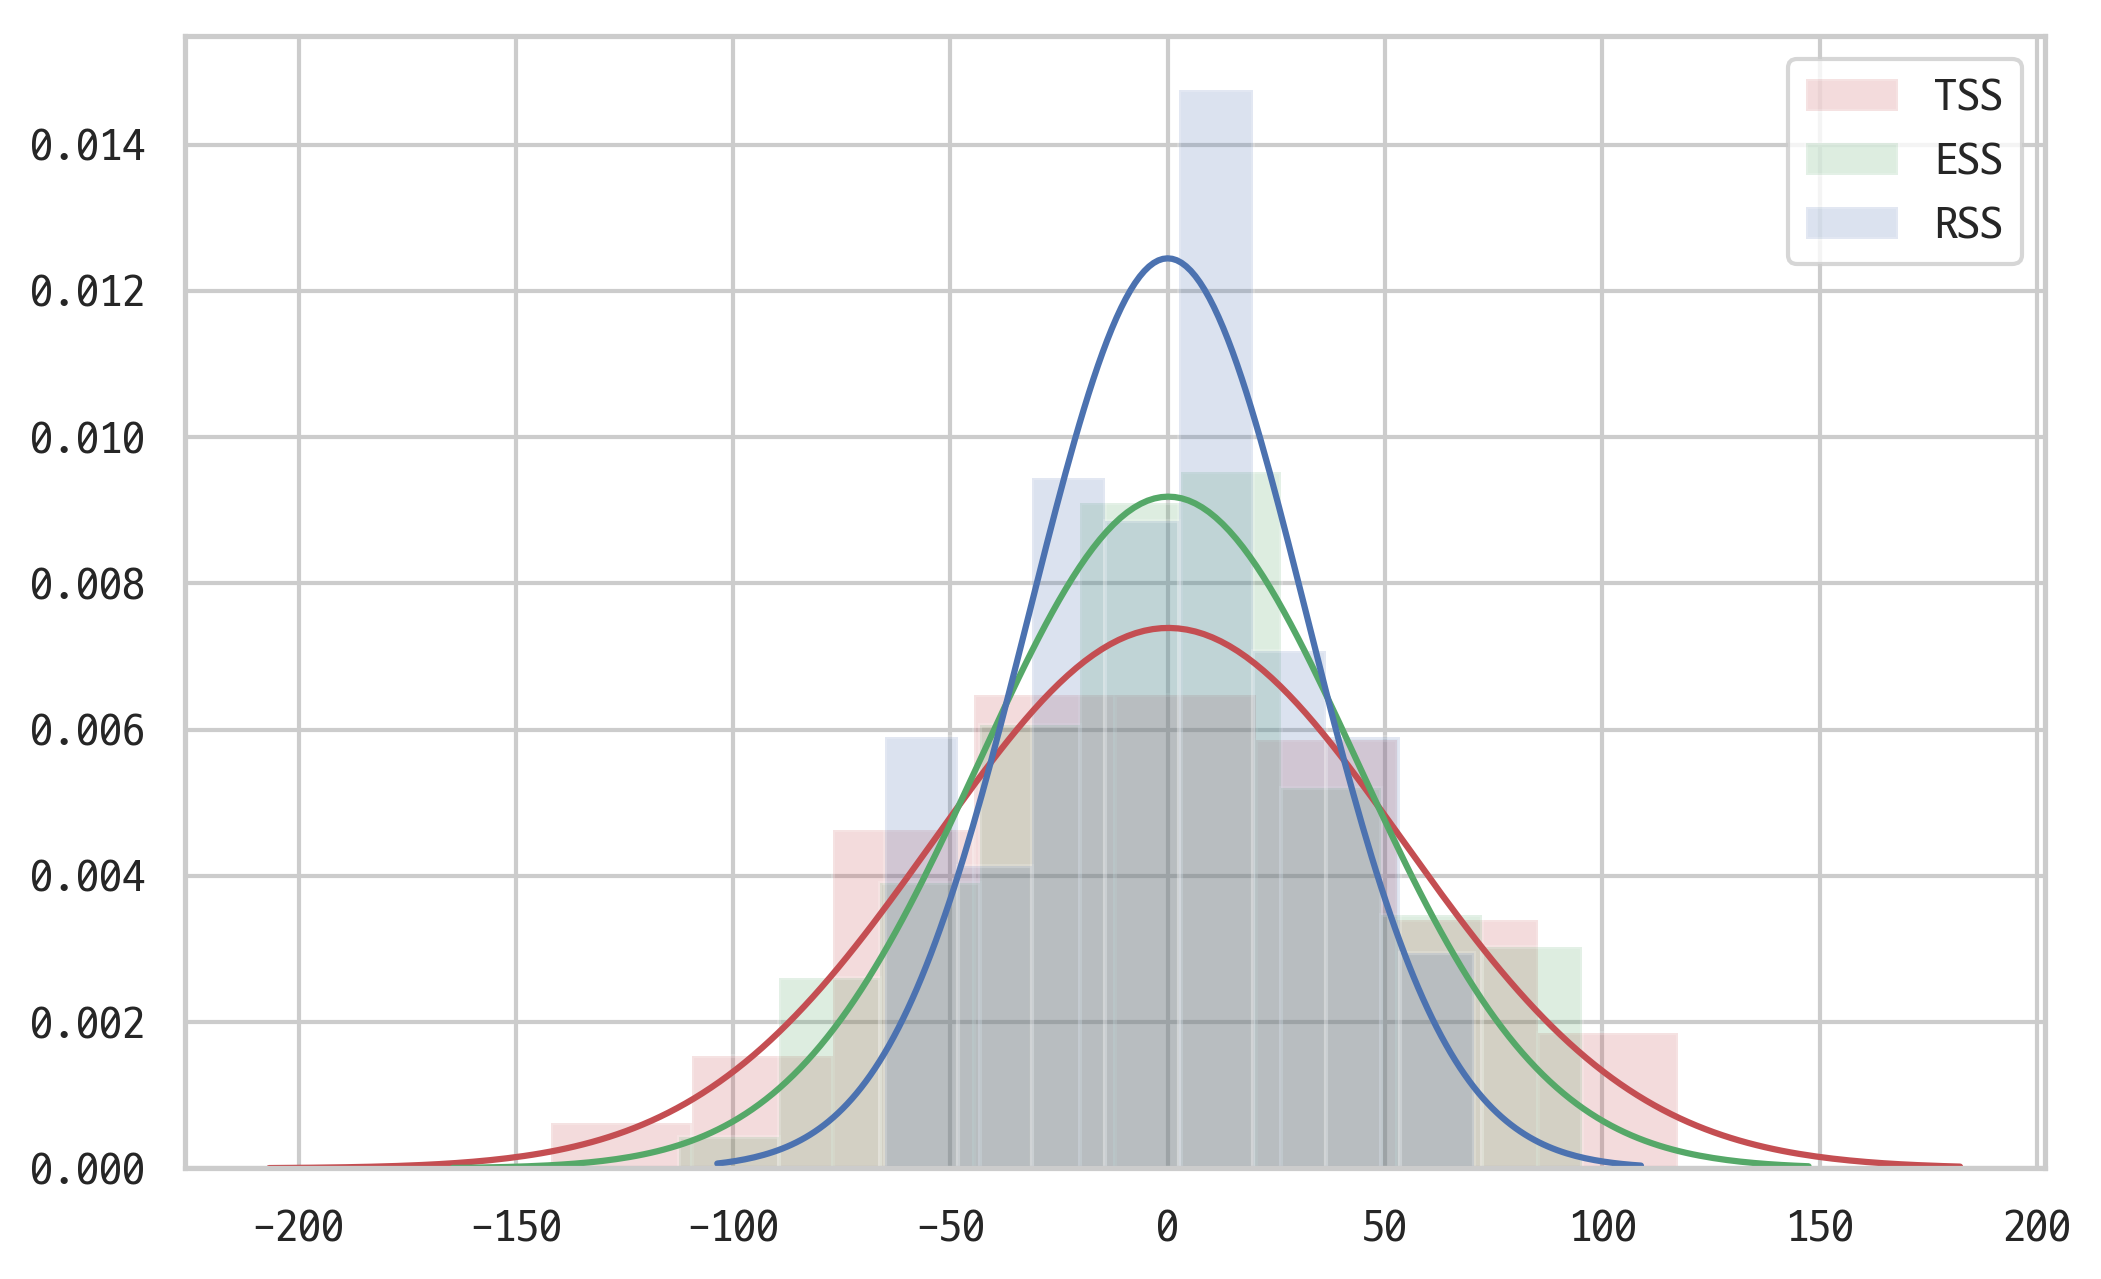

In [8]:
sns.distplot(y,
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()